<a href="https://colab.research.google.com/github/Mahendran180923/News_Senticonomy/blob/main/Senticonomy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Senticonomy

# **import dataset from kaggle**

In [ ]:
!pip install kaggle -q

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
# Dowload newyork times news dataset from Kaggle
!curl -L -o nyt-articles-21m-2000-present.zip https://www.kaggle.com/api/v1/datasets/download/aryansingh0909/nyt-articles-21m-2000-present


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  875M  100  875M    0     0  85.8M      0  0:00:10  0:00:10 --:--:-- 97.7M


In [ ]:
# Unzip the downloaded file
!unzip -q nyt-articles-21m-2000-present.zip

In [ ]:
#Read CSV file using pandas library
import pandas as pd


data = pd.read_csv('/content/nyt-metadata.csv')
print(data.head())

<ipython-input-7-74dd5e42f531>:5: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/nyt-metadata.csv')


                                            abstract  \
0  Article on upcoming New York Giants-Dallas Cow...   
1  Jeanne C Pond letter expresses hope that spiri...   
2  Many experts on Y2K computer problem report th...   
3  WILL the forces of globalism continue to push ...   
4   SPECIAL TODAY  The Millennium  Envisioning th...   

                                             web_url  \
0  https://www.nytimes.com/2000/01/01/sports/pro-...   
1  https://www.nytimes.com/2000/01/01/opinion/l-o...   
2  https://www.nytimes.com/2000/01/01/us/1-1-00-t...   
3  https://www.nytimes.com/2000/01/01/news/vision...   
4  https://www.nytimes.com/2000/01/01/nyregion/in...   

                                             snippet  \
0  Article on upcoming New York Giants-Dallas Cow...   
1  Jeanne C Pond letter expresses hope that spiri...   
2  Many experts on Y2K computer problem report th...   
3                                                NaN   
4                                             

# Data handling -> remove null values and drop unwanted columns

In [ ]:
data.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'print_section',
       'print_page', 'source', 'multimedia', 'headline', 'keywords',
       'pub_date', 'document_type', 'news_desk', 'section_name', 'byline',
       'type_of_material', '_id', 'word_count', 'uri', 'subsection_name'],
      dtype='object')

In [ ]:
data.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,headline,keywords,pub_date,document_type,news_desk,section_name,byline,type_of_material,_id,word_count,uri,subsection_name
0,Article on upcoming New York Giants-Dallas Cow...,https://www.nytimes.com/2000/01/01/sports/pro-...,Article on upcoming New York Giants-Dallas Cow...,Waiting in the visiting locker room at Texas S...,D,2.0,The New York Times,[],"{'main': 'Playoffs or No, Dallas Provides The ...","[{'name': 'organizations', 'value': 'New York ...",2000-01-01 05:00:00+00:00,article,Sports Desk,Sports,"{'original': 'By Bill Pennington', 'person': [...",News,nyt://article/01111a48-3502-5021-8096-bc929379...,819.0,nyt://article/01111a48-3502-5021-8096-bc929379...,NaN
1,Jeanne C Pond letter expresses hope that spiri...,https://www.nytimes.com/2000/01/01/opinion/l-o...,Jeanne C Pond letter expresses hope that spiri...,To the Editor:,A,30.0,The New York Times,[],"{'main': 'On This First Day, a Fanfare for the...","[{'name': 'persons', 'value': 'Pond, Jeanne C'...",2000-01-01 05:00:00+00:00,article,Editorial Desk,Opinion,"{'original': '', 'person': [], 'organization':...",Letter,nyt://article/02328edc-dad1-5eb0-900e-917162e4...,122.0,nyt://article/02328edc-dad1-5eb0-900e-917162e4...,NaN
2,Many experts on Y2K computer problem report th...,https://www.nytimes.com/2000/01/01/us/1-1-00-t...,Many experts on Y2K computer problem report th...,As the world slid nervously yesterday through ...,A,10.0,The New York Times,[],"{'main': ""Internet's Cheering Squad Nervously ...","[{'name': 'subject', 'value': 'Electronic Mail...",2000-01-01 05:00:00+00:00,article,National Desk,U.S.,"{'original': 'By Barnaby J. Feder', 'person': ...",News,nyt://article/02a8f89b-153f-5b84-983c-e328de5b...,761.0,nyt://article/02a8f89b-153f-5b84-983c-e328de5b...,NaN
3,WILL the forces of globalism continue to push ...,https://www.nytimes.com/2000/01/01/news/vision...,NaN,WILL the forces of globalism continue to push ...,E,4.0,The New York Times,[],{'main': 'Economic Thinking Finds a Free Marke...,[],2000-01-01 05:00:00+00:00,article,The Millennium,Archives,"{'original': 'By Floyd Norris', 'person': [{'f...",News,nyt://article/0634d837-97b8-59b5-aa17-f90d1a89...,916.0,nyt://article/0634d837-97b8-59b5-aa17-f90d1a89...,NaN
4,SPECIAL TODAY The Millennium Envisioning th...,https://www.nytimes.com/2000/01/01/nyregion/in...,NaN,SPECIAL TODAY,A,1.0,The New York Times,[],"{'main': 'INSIDE', 'kicker': None, 'content_ki...",[],2000-01-01 05:00:00+00:00,article,Metropolitan Desk,New York,"{'original': '', 'person': [], 'organization':...",Summary,nyt://article/0654cc64-c37f-594d-9290-1ce578cd...,102.0,nyt://article/0654cc64-c37f-594d-9290-1ce578cd...,NaN


In [ ]:
print(data['news_desk'].unique())

['Sports Desk' 'Editorial Desk' 'National Desk' 'The Millennium'
 'Metropolitan Desk' 'Classified' 'Business/Financial Desk'
 'The Arts/Cultural Desk' 'Foreign Desk' nan 'The Millenium' 'Travel Desk'
 'New Jersey Weekly Desk' 'Book Review Desk'
 'Money and Business/Financial Desk' 'The City Weekly Desk'
 'Long Island Weekly Desk' 'Style Desk' 'Westchester Weekly Desk'
 'Real Estate Desk' 'Magazine Desk' 'Connecticut Weekly Desk'
 'Week in Review Desk' 'Arts and Leisure Desk' 'Society Desk'
 'Leisure/Weekend Desk' 'Television' 'Automobiles' 'Style'
 'Health & Fitness' 'Science Desk' 'News' 'Workplace'
 'Dining In, Dining Out/Style Desk' 'Dining In, Dining Out'
 'House & Home/Style Desk' 'Circuits'
 'Movies, Performing Arts/Weekend Desk' 'Automobile'
 'Arts & Ideas/Cultural Desk' 'Education Life Supplement'
 'Money & Business/Financial Desk' 'Dining & Wine'
 'Sports DeskSports Desk' 'Retirement' 'Fashions of The Times Magazine'
 'Sophisticated Traveler Magazine' 'Books' 'Health Desk' 'Ge

In [ ]:
data.isnull().sum()

,0
abstract,31917
web_url,1
snippet,196167
lead_paragraph,41988
print_section,746603
print_page,747851
source,1
multimedia,1
headline,1
keywords,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191681 entries, 0 to 2191680
Data columns (total 20 columns):
 #   Column            Dtype  
---  ------            -----  
 0   abstract          object 
 1   web_url           object 
 2   snippet           object 
 3   lead_paragraph    object 
 4   print_section     object 
 5   print_page        object 
 6   source            object 
 7   multimedia        object 
 8   headline          object 
 9   keywords          object 
 10  pub_date          object 
 11  document_type     object 
 12  news_desk         object 
 13  section_name      object 
 14  byline            object 
 15  type_of_material  object 
 16  _id               object 
 17  word_count        float64
 18  uri               object 
 19  subsection_name   object 
dtypes: float64(1), object(19)
memory usage: 334.4+ MB


In [ ]:
# Copy the data in different variable for future reference
df = pd.DataFrame(data)

In [ ]:
# Drop unwatned columns

df.drop(['print_section', 'snippet', 'print_page', 'source', 'document_type', 'byline', 'keywords',  'news_desk', 'type_of_material',  '_id', 'word_count', 'uri', 'multimedia', 'subsection_name'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
abstract,31917
web_url,1
lead_paragraph,41988
headline,1
pub_date,1
section_name,2010


In [ ]:
# drop the row where date is having null values
df.dropna(subset=['pub_date'], inplace=True)

In [ ]:
df.isnull().sum()

,0
abstract,31917
web_url,1
lead_paragraph,41987
headline,0
pub_date,0
section_name,2009


In [ ]:
import numpy as np
df['lead_paragraph'] = np.where(df['lead_paragraph'].isnull(),
                                   df['abstract'] ,
                                   df['lead_paragraph'])

In [ ]:
df.isnull().sum()

,0
abstract,31917
web_url,1
lead_paragraph,31916
headline,0
pub_date,0
section_name,2009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2191680 entries, 0 to 2191680
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   abstract        object
 1   web_url         object
 2   lead_paragraph  object
 3   headline        object
 4   pub_date        object
 5   section_name    object
dtypes: object(6)
memory usage: 117.0+ MB


In [ ]:
df.dropna(how='any', inplace=True)

# Kept data from 2015 and drop the data before 2015

In [ ]:
# Download required package for filtering the data
!pip install python-dateutil pytz

In [ ]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pytz

# Convert the date into datetime format from object
df['pub_date'] = pd.to_datetime(df['pub_date'])

# Calculate the date 5 years ago
ten_years_ago = (datetime.now(pytz.UTC) - relativedelta(years=10))

# Filter the DataFrame to include only rows with pub_date within the last 5 years
df_filtered = df[df['pub_date'] >= ten_years_ago]

# Print the first few rows of the filtered DataFrame
print(df_filtered.head())

                                                  abstract  \
1704739  The remote Russian peninsula is caught between...   
1704740  Photographers featured this week on @nytimes t...   
1704741  The class-action lawyer, who specializes in fi...   
1704742  Cooking classes at hotels are going well beyon...   
1704743                         Getting the history right.   

                                                   web_url  \
1704739  https://www.nytimes.com/2015/04/05/world/europ...   
1704740  https://www.nytimes.com/slideshow/2015/04/02/n...   
1704741  https://www.nytimes.com/2015/04/05/technology/...   
1704742  https://intransit.blogs.nytimes.com/2015/04/04...   
1704743  https://krugman.blogs.nytimes.com/2015/04/04/o...   

                                            lead_paragraph  \
1704739  PETROPAVLOVSK-KAMCHATSKY, Russia — When Vladis...   
1704740  Photographers featured this week on @nytimes t...   
1704741  When technology executives imagine the boogeym...   
170474

In [ ]:
df_filtered.isnull().sum()

,0
abstract,0
web_url,0
lead_paragraph,0
headline,0
pub_date,0
section_name,0


# Save dataframe as CSV file

In [ ]:
df_filtered.to_csv('news_data.csv')

# Push CSV file to AWS S3 Bucket

In [ ]:
import os

file_size = os.path.getsize('news_data.csv')

if file_size < 1024:
    print(f"The size of the CSV file is: {file_size} bytes")
elif file_size < 1024 ** 2:
    print(f"The size of the CSV file is: {file_size / 1024:.2f} KB")
else:
    print(f"The size of the CSV file is: {file_size / (1024 ** 2):.2f} MB")

The size of the CSV file is: 325.68 MB


In [ ]:
df_filtered

,abstract,web_url,lead_paragraph,headline,pub_date,section_name
1704739,The remote Russian peninsula is caught between...,https://www.nytimes.com/2015/04/05/world/europ...,"PETROPAVLOVSK-KAMCHATSKY, Russia — When Vladis...","{'main': 'Kamchatka, Home to Russian Version o...",2015-04-04 10:09:49+00:00,World
1704740,Photographers featured this week on @nytimes t...,https://www.nytimes.com/slideshow/2015/04/02/n...,Photographers featured this week on @nytimes t...,"{'main': 'The Week on Instagram', 'kicker': No...",2015-04-04 10:57:20+00:00,NYT Now
1704741,"The class-action lawyer, who specializes in fi...",https://www.nytimes.com/2015/04/05/technology/...,When technology executives imagine the boogeym...,"{'main': 'Jay Edelson, the Class-Action Lawyer...",2015-04-04 11:00:38+00:00,Technology
1704742,Cooking classes at hotels are going well beyon...,https://intransit.blogs.nytimes.com/2015/04/04...,Cooking classes at hotels are going well beyon...,"{'main': 'Hotel Guests Forage for Meals', 'kic...",2015-04-04 12:14:00+00:00,Travel
1704743,Getting the history right.,https://krugman.blogs.nytimes.com/2015/04/04/o...,"As I think I’ve mentioned, as part of a longer...","{'main': 'Osbornia Revisited', 'kicker': 'Paul...",2015-04-04 12:28:18+00:00,Opinion
...,...,...,...,...,...,...
2191676,"The National Endowment for the Humanities, whi...",https://www.nytimes.com/2025/04/01/arts/trump-...,Leaders at the National Endowment for the Huma...,{'main': 'DOGE Demands Deep Cuts at Humanities...,2025-04-01 23:00:05+00:00,Arts
2191677,"In an unorthodox move, Ed Martin, the interim ...",https://www.nytimes.com/2025/04/01/us/politics...,"Ed Martin, the ardent Trump loyalist serving a...",{'main': 'Trump-Allied Prosecutor Looks to Und...,2025-04-01 23:20:33+00:00,U.S.
2191678,Although the Trump Organization sold a golf co...,https://www.nytimes.com/2025/04/01/nyregion/tr...,When the Trump Organization sold its interest ...,{'main': 'If New York Puts a Casino in the Bro...,2025-04-01 23:26:31+00:00,New York
2191679,"Randy Fine, a state senator, won a special ele...",https://www.nytimes.com/2025/04/01/us/politics...,"Randy Fine, a Republican state senator in Flor...","{'main': 'Randy Fine, a State Senator, Wins a ...",2025-04-01 23:41:46+00:00,U.S.


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485216 entries, 1704739 to 2191680
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   abstract        485216 non-null  object             
 1   web_url         485216 non-null  object             
 2   lead_paragraph  485216 non-null  object             
 3   headline        485216 non-null  object             
 4   pub_date        485216 non-null  datetime64[ns, UTC]
 5   section_name    485216 non-null  object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 25.9+ MB


In [ ]:
# Download required packages for store the csv file in AWS S3 Bucket
!pip install boto3 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.6/139.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 5.9 MB/s eta 0:00:00


In [ ]:
# Security Credentials

access_key = aws_access_key
secret_key = aws_secret_key

# Preprocessing of the data

In [ ]:
import pandas as pd
import ast
import numpy as np


uncleaned_data = pd.read_csv('/content/news_data.csv')
cleaned_data = pd.DataFrame(uncleaned_data)

# cleaned_data['keywords'] = cleaned_data['keywords'].apply(lambda x: [d['value'] for d in ast.literal_eval(x)])

# cleaned_data['keywords'] = cleaned_data['keywords'].apply(lambda x: ' '.join(x))

cleaned_data.drop(['Unnamed: 0'], axis=1, inplace=True)

cleaned_data['pub_date'] = pd.to_datetime(cleaned_data['pub_date'])

cleaned_data['headline'] = cleaned_data['headline'].apply(lambda x: ast.literal_eval(x)['main'])

cleaned_data['lead_paragraph'] = np.where(cleaned_data['lead_paragraph'] == 'To the Editor:',
                                   cleaned_data['abstract'] ,
                                   cleaned_data['lead_paragraph'])

cleaned_data.rename(columns={'lead_paragraph': 'content', 'section_name': 'category'}, inplace=True)

cleaned_data['year'] = cleaned_data['pub_date'].dt.year
cleaned_data['month'] = cleaned_data['pub_date'].dt.month
cleaned_data['day'] = cleaned_data['pub_date'].dt.day
cleaned_data['day_of_week'] = cleaned_data['pub_date'].dt.day_name()
cleaned_data['time'] = cleaned_data['pub_date'].dt.time

cleaned_data.drop('pub_date', axis=1, inplace=True)

cleaned_data.isnull().sum()


,0
abstract,0
web_url,0
content,0
headline,0
category,0
year,0
month,0
day,0
day_of_week,0
time,0


In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
cleaned_data.tail()

,abstract,web_url,content,headline,category,year,month,day,day_of_week,time
485211,"The National Endowment for the Humanities, which supports museums, scholarship and historical sites, could see grants curtailed and staffing slashed by up to 80 percent.",https://www.nytimes.com/2025/04/01/arts/trump-doge-federal-cuts-humanities.html,"Leaders at the National Endowment for the Humanities have informed employees that the Trump administration is demanding deep cuts to staff and programs at the agency, in the latest move against federal agencies that support scholarship and culture.",DOGE Demands Deep Cuts at Humanities Endowment,Arts,2025,4,1,Tuesday,23:00:05
485212,"In an unorthodox move, Ed Martin, the interim U.S. attorney in Washington, is questioning former President Joseph R. Biden Jr.’s family and former White House officials about clemency.",https://www.nytimes.com/2025/04/01/us/politics/trump-prosecutor-biden-pardons.html,"Ed Martin, the ardent Trump loyalist serving as interim U.S. attorney in Washington, is pursuing an inquiry into whether former President Joseph R. Biden Jr. was competent to pardon his family members and others during his final days in office.",Trump-Allied Prosecutor Looks to Undermine Biden Pardons,U.S.,2025,4,1,Tuesday,23:20:33
485213,"Although the Trump Organization sold a golf course in Ferry Point Park in the Bronx to Bally’s, it will still receive a windfall if the site is chosen for a casino.",https://www.nytimes.com/2025/04/01/nyregion/trump-casino-ballys-bronx.html,"When the Trump Organization sold its interest in a public golf course in New York City to Bally’s, the deal was freighted with symbolism.","If New York Puts a Casino in the Bronx, Trump Will Get $115 Million",New York,2025,4,1,Tuesday,23:26:31
485214,"Randy Fine, a state senator, won a special election to replace Michael Waltz of Florida, who is now Trump’s national security adviser.",https://www.nytimes.com/2025/04/01/us/politics/florida-special-election-winner.html,"Randy Fine, a Republican state senator in Florida, won the special election in Florida’s Sixth Congressional District on Tuesday, according to The Associated Press.","Randy Fine, a State Senator, Wins a House Seat in Florida, Adding to the G.O.P. Majority.",U.S.,2025,4,1,Tuesday,23:41:46
485215,The cracks in support show how seriously some conservatives are taking the administration’s aggressive and at times slapdash tactics.,https://www.nytimes.com/2025/04/01/us/politics/trump-immigration-joe-rogan-conservatives.html,"Influential figures on the right have largely cheered on the opening months of the Trump presidency. But as the administration has rushed to carry out deportations as quickly as possible, making mistakes and raising concerns about due process along the way, the unified front in favor of President Trump’s immigration purge is beginning to crack.",Some Conservative Voices Raise Alarm Over Trump’s Immigration Tactics,U.S.,2025,4,1,Tuesday,23:58:42


In [ ]:
import numpy as np

unique_categories, counts = np.unique(cleaned_data['category'], return_counts=True)

for category, count in zip(unique_categories, counts):
    print(f"{category}: {count}")

Admin: 294
Archives: 1
Arts: 38859
At Home: 491
Automobiles: 336
Blogs: 1666
Book Review: 1
Books: 16150
Briefing: 8290
Burst: 62
Business Day: 33847
Climate: 2745
Corrections: 3560
Crosswords & Games: 5320
Education: 1793
Fashion & Style: 14873
Food: 9964
Giving: 25
Guide: 3
Guides: 23
Headway: 26
Health: 5769
Home & Garden: 8
Homepage: 22
International Home: 32
Job Market: 276
Lens: 264
Magazine: 6786
Movies: 12652
Multimedia/Photos: 1888
NYT Now: 1494
Neediest Cases: 186
New York: 25531
Obituaries: 2995
Open: 3
Opinion: 48167
Parenting: 912
Podcasts: 3478
Polls: 1
Public Editor: 117
Reader Center: 919
Real Estate: 9813
Science: 6167
Slideshows: 2
Smarter Living: 957
Special Series: 102
Sports: 28927
Style: 9231
Sunday Review: 239
T Brand: 215
T Magazine: 7692
Technology: 8927
The Learning Network: 6860
The New York Times Presents: 21
The Upshot: 3663
The Weekly: 33
Theater: 6852
Times Insider: 2310
Times Topics: 47
Today’s Paper: 2463
Topics: 3
Travel: 5343
U.S.: 76133
Universal: 15

In [ ]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import download


download('punkt')
download('wordnet')
download('stopwords')


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
  tokens = word_tokenize(text)

  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  tokens = [token for token in tokens if token not in stop_words]

  return ' '.join(tokens)


cleaned_data['processed_content'] = cleaned_data['content'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
cleaned_data['content'].head()

,content
0,"WASHINGTON — It was once a sideshow to the American military in Afghanistan and later became one of the largest diplomatic missions in the world. Now, as the United States Embassy in Kabul transitions to its newest role, its future is tied to a fragile peace process, one that will withdraw American troops even as violence continues."
1,On Saturday we ran a sampling of letters we received when we asked readers how they were dealing with the disruption in their lives. Below are several more responses.
2,"Jane Clementi, the mother of Tyler Clementi, discusses anti-transgender rights bills in state legislatures. Also: Stacking the federal courts."
3,WASHINGTON — The American economy has stopped working.
4,"WASHINGTON — When President Trump took the podium at the White House briefing room one afternoon last week, his prepared remarks included a reference to the “corona virus.” But a close-up photograph revealed that Mr. Trump had used one of his signature Sharpies to cross out the word “corona,” changing the phrase to “Chinese virus.”"


In [ ]:
cleaned_data['processed_content'].head()

,processed_content
0,"WASHINGTON — It wa sideshow American military Afghanistan later became one largest diplomatic mission world . Now , United States Embassy Kabul transition newest role , future tied fragile peace process , one withdraw American troop even violence continues ."
1,On Saturday ran sampling letter received asked reader dealing disruption life . Below several response .
2,"Jane Clementi , mother Tyler Clementi , discusses anti-transgender right bill state legislature . Also : Stacking federal court ."
3,WASHINGTON — The American economy ha stopped working .
4,"WASHINGTON — When President Trump took podium White House briefing room one afternoon last week , prepared remark included reference “ corona virus. ” But close-up photograph revealed Mr. Trump used one signature Sharpies cross word “ corona , ” changing phrase “ Chinese virus . ”"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(cleaned_data['processed_content'])

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=21, random_state=42)
cleaned_data['cluster'] =  model.fit_predict(x)

In [ ]:
wcss = []

for i in range(1,50):
  model = KMeans(n_clusters=i)
  model.fit(x)
  wcss.append(model.inertia_)

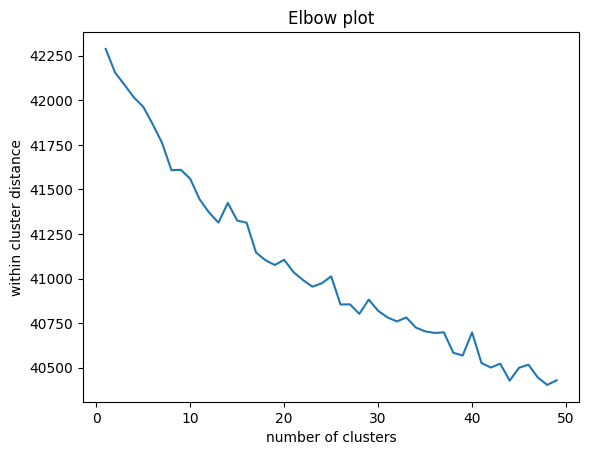

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,50),wcss)
plt.title("Elbow plot")
plt.xlabel("number of clusters")
plt.ylabel("within cluster distance")
plt.show()

In [ ]:
wcss

[42288.457784516686,
 42155.48940102517,
 42087.103539573094,
 42016.37765456464,
 41963.475722474985,
 41866.260956693055,
 41761.030025214044,
 41607.78498187034,
 41610.216414882794,
 41559.386443850395,
 41444.310626388724,
 41370.8450733216,
 41313.89747575563,
 41424.286614649645,
 41325.065670227275,
 41313.29222641288,
 41146.42404760794,
 41102.92950594683,
 41076.12511889517,
 41105.32553078858,
 41035.41856858806,
 40991.7864548233,
 40954.43121755871,
 40973.22275890584,
 41012.40895929076,
 40854.24389026701,
 40855.48634423105,
 40801.76603338896,
 40881.94978570301,
 40819.06058472735,
 40781.73143054825,
 40759.488495121135,
 40781.239423057144,
 40725.62615226815,
 40703.742833701275,
 40694.90137578114,
 40698.079257194724,
 40583.64843856242,
 40568.105821314995,
 40697.66237946126,
 40526.037474837474,
 40500.73883754521,
 40522.43482776111,
 40427.15346437262,
 40499.44517977899,
 40516.649687938356,
 40444.62634680672,
 40403.136431786705,
 40428.88079839316]

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()
cleaned_data['sentiment_score'] = cleaned_data['processed_content'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
cleaned_data['sentiment_score']

,sentiment_score
0,0.2960
1,-0.3612
2,0.0000
3,0.1280
4,0.1154
...,...
42628,-0.6808
42629,-0.0790
42630,0.5574
42631,0.7269


In [ ]:
cleaned_data['sentiment_label'] = cleaned_data['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))
# print(cleaned_data['sentiment_label'].value_counts())

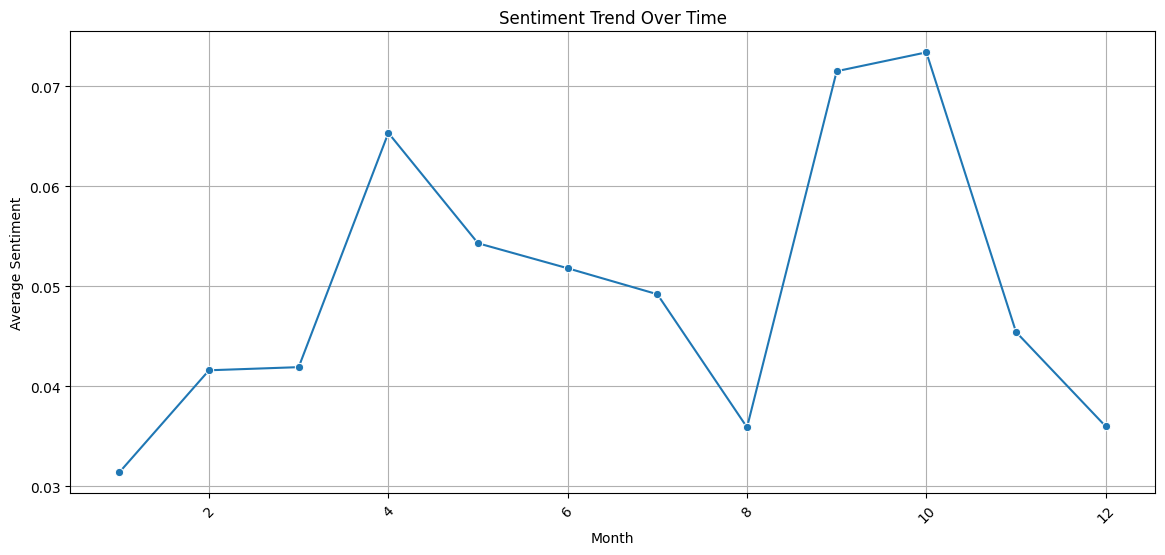

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the average sentiment score for each month
monthly_sentiment = cleaned_data.groupby('month')['sentiment_score'].mean().reset_index()

# Plotting the sentiment trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sentiment, x='month', y='sentiment_score', marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

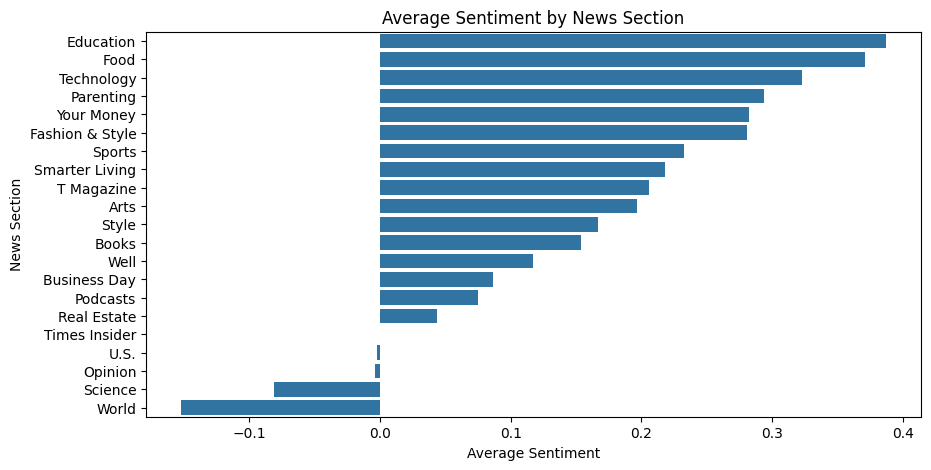

In [ ]:
category_sentiment = cleaned_data.groupby('category')['sentiment_score'].mean().sort_values(ascending=False)

# Plotting sentiment by category
plt.figure(figsize=(10, 5))
sns.barplot(x=category_sentiment.values, y=category_sentiment.index)
plt.title('Average Sentiment by News Section')
plt.xlabel('Average Sentiment')
plt.ylabel('News Section')
plt.show()